<center><span style="font-size: 36pt">INDENG 242A: Homework 3</span></center>
<center><span style="font-size: 24pt">Capucine Hustin</span></center>

<span style="font-size: 18pt"><u>Problem 1</u></span>

<u><b>QUESTION A</b></u>

$$
\text{Total impurity before split}= N_1 \times Q_1 = n \times (\frac{1}{n}\sum_{i=1}^n(y_i-\hat{y_n})^2)= \sum_{i=1}^n(y_i-\hat{y_n})^2
$$

$$
\text{Where  } \text{  } \hat{y_n}= \sum_{i=1}^ny_i
$$

<u><b>QUESTION B</b></u>

$$
\text{Total impurity after split}= N_1 \times Q_1 + N_2 \times Q_2= N \times (\frac{1}{N}\sum_{i=1}^N(y_i-\hat{y_N})^2) + (n-N) \times (\frac{1}{n-N}\sum_{i=N+1}^n(y_i-\hat{y}_{N+1,n})^2)
$$

$$
\text{i.e Total impurity after split}= \sum_{i=1}^N(y_i-\hat{y_N})^2 + \sum_{i=N+1}^n(y_i-\hat{y}_{N+1,n})^2
$$

$$
\text{Where  } \text{  } \hat{y_N}= \sum_{i=1}^Ny_i \text{,    and   }\text{  } \hat{y}_{N+1,n}=\sum_{i=N+1}^ny_i 
$$

<u><b>QUESTION C</b></u>

The minimizer of the fuction RSS(z) is $ \sum_{i=1}^ny_i $ (the mean).

Thus, 

$$
\forall y, \sum_{i=1}^N(y_i-\hat{y}_{N})^2 \leq \sum_{i=1}^N(y_i-y)^2
$$

$$
\forall y, \sum_{i=N+1}^n(y_i-\hat{y}_{N+1,n})^2 \leq \sum_{i=N+1}^n(y_i-y)^2

$$

In particular if we take y=$\hat{y_n}$, 

$$
\sum_{i=1}^N(y_i-\hat{y}_{N})^2  +  \sum_{i=N+1}^n(y_i-\hat{y}_{N+1,n})^2 \leq \sum_{i=1}^N(y_i-\hat{y_n})^2 + \sum_{i=N+1}^n(y_i-\hat{y_n})^2 = \sum_{i=1}^n(y_i-\hat{y_n})^2

$$

Thus, the total impurity value after the split is always less than or equal to
the total impurity value before the split

<span style="font-size: 18pt"><u>Problem 2</u></span>

<u><b>QUESTION A</b></u>

I think that this can be a reasonnable approach.\
In some features, there is more than 75% of the data that is missing and the majority of features has more that 30% of missing data. One of the traditional ways to deal with data is to drop the lines where there is a missing value. However, here, as some features have more than 75% of the data that is missing, we wouldn't have much data left. An other way to deal with the missing data is to replace them. We can do it with the mean/median, but once again for the feature having more than 75% missing data it makes no sense. We can replace the missing data by determining the missing value with a regression or with the k-nearest neighbour tool. But there is so many missing data, that I believe that these value wouldn't be great.\
Having the missing data as an explicit category can be a substitute to the traditional ways I just mentionned.

<u><b>QUESTION B</b></u>

<b>(i)</b>

In [85]:
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

In [126]:
yelp_train = pd.read_csv("yelp242a_train.csv")
yelp_test = pd.read_csv("yelp242a_test.csv")


Y_train=yelp_train['stars']
X_train = yelp_train.drop('stars', axis=1)

Y_test=yelp_test['stars']
X_test = yelp_test.drop('stars', axis=1)


In [87]:
import statsmodels.formula.api as smf

modela = smf.ols(formula='stars ~ review_count + C(GoodForKids, Treatment("(Missing)")) + C(Alcohol, Treatment("(Missing)")) + C(BusinessAcceptsCreditCards, Treatment("(Missing)")) + C(WiFi, Treatment("(Missing)")) + C(BikeParking, Treatment("(Missing)")) + C(ByAppointmentOnly, Treatment("(Missing)")) + C(WheelechairAccessible, Treatment("(Missing)")) + C(OutdoorSeating, Treatment("(Missing)")) + C(RestaurantsReservations, Treatment("(Missing)")) + C(DogsAllowed, Treatment("(Missing)")) + C(Caters, Treatment("(Missing)"))',
                 data=yelp_train).fit()
print(modela.summary())

                            OLS Regression Results                            
Dep. Variable:                  stars   R-squared:                       0.163
Model:                            OLS   Adj. R-squared:                  0.159
Method:                 Least Squares   F-statistic:                     48.56
Date:                Fri, 08 Mar 2024   Prob (F-statistic):          1.30e-218
Time:                        23:21:33   Log-Likelihood:                -7295.9
No. Observations:                6272   AIC:                         1.464e+04
Df Residuals:                    6246   BIC:                         1.482e+04
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                                                                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------

<b>(ii)</b>

In [88]:
yelp_train_enc=pd.get_dummies(yelp_train, columns = ['GoodForKids','Alcohol','BusinessAcceptsCreditCards','WiFi','BikeParking','ByAppointmentOnly','WheelechairAccessible','OutdoorSeating','RestaurantsReservations','DogsAllowed','Caters'],drop_first=True)
Y_train_enc=yelp_train_enc['stars']
X_train_enc = yelp_train_enc.drop('stars', axis=1)

yelp_test_enc=pd.get_dummies(yelp_test, columns = ['GoodForKids','Alcohol','BusinessAcceptsCreditCards','WiFi','BikeParking','ByAppointmentOnly','WheelechairAccessible','OutdoorSeating','RestaurantsReservations','DogsAllowed','Caters'],drop_first=True)
Y_test_enc=yelp_test_enc['stars']
X_test_enc = yelp_test_enc.drop('stars', axis=1)

In [89]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor


grid_values = {'ccp_alpha': np.linspace(0, 0.10, 201),
               'min_samples_leaf': [5],
               'min_samples_split': [20],
               'max_depth': [30],
               'random_state': [88]}


dt_regressor = DecisionTreeRegressor()

dtc_reg_cv_acc = GridSearchCV(dt_regressor, param_grid = grid_values, scoring='neg_mean_squared_error', cv=10, verbose=1) 
dtc_reg_cv_acc.fit(X_train_enc, Y_train_enc)


Fitting 10 folds for each of 201 candidates, totalling 2010 fits


GridSearchCV(cv=10, estimator=DecisionTreeRegressor(),
             param_grid={'ccp_alpha': array([0.    , 0.0005, 0.001 , 0.0015, 0.002 , 0.0025, 0.003 , 0.0035,
       0.004 , 0.0045, 0.005 , 0.0055, 0.006 , 0.0065, 0.007 , 0.0075,
       0.008 , 0.0085, 0.009 , 0.0095, 0.01  , 0.0105, 0.011 , 0.0115,
       0.012 , 0.0125, 0.013 , 0.0135, 0.014 , 0.0145, 0.015 , 0.0155,
       0.016 , 0.0165, 0.017 , 0.0175, 0.018 , 0.0185, 0.019 , 0.0195,
       0.02  , 0.020...
       0.08  , 0.0805, 0.081 , 0.0815, 0.082 , 0.0825, 0.083 , 0.0835,
       0.084 , 0.0845, 0.085 , 0.0855, 0.086 , 0.0865, 0.087 , 0.0875,
       0.088 , 0.0885, 0.089 , 0.0895, 0.09  , 0.0905, 0.091 , 0.0915,
       0.092 , 0.0925, 0.093 , 0.0935, 0.094 , 0.0945, 0.095 , 0.0955,
       0.096 , 0.0965, 0.097 , 0.0975, 0.098 , 0.0985, 0.099 , 0.0995,
       0.1   ]),
                         'max_depth': [30], 'min_samples_leaf': [5],
                         'min_samples_split': [20], 'random_state': [88]},
             scoring='neg_mean_squared_error', verbose=1)

In [131]:
acc = dtc_reg_cv_acc.cv_results_['mean_test_score'] # what sklearn calls mean_test_score is the holdout set, i.e. the validation set.
ccp = dtc_reg_cv_acc.cv_results_['param_ccp_alpha'].data

In [91]:
print('Grid best parameter ccp_alpha (max. accuracy): ', dtc_reg_cv_acc.best_params_['ccp_alpha'])
print('Grid best score (accuracy): ', dtc_reg_cv_acc.best_score_)

Grid best parameter ccp_alpha (max. accuracy):  0.001
Grid best score (accuracy):  -0.5979567257022856


Node count = 61


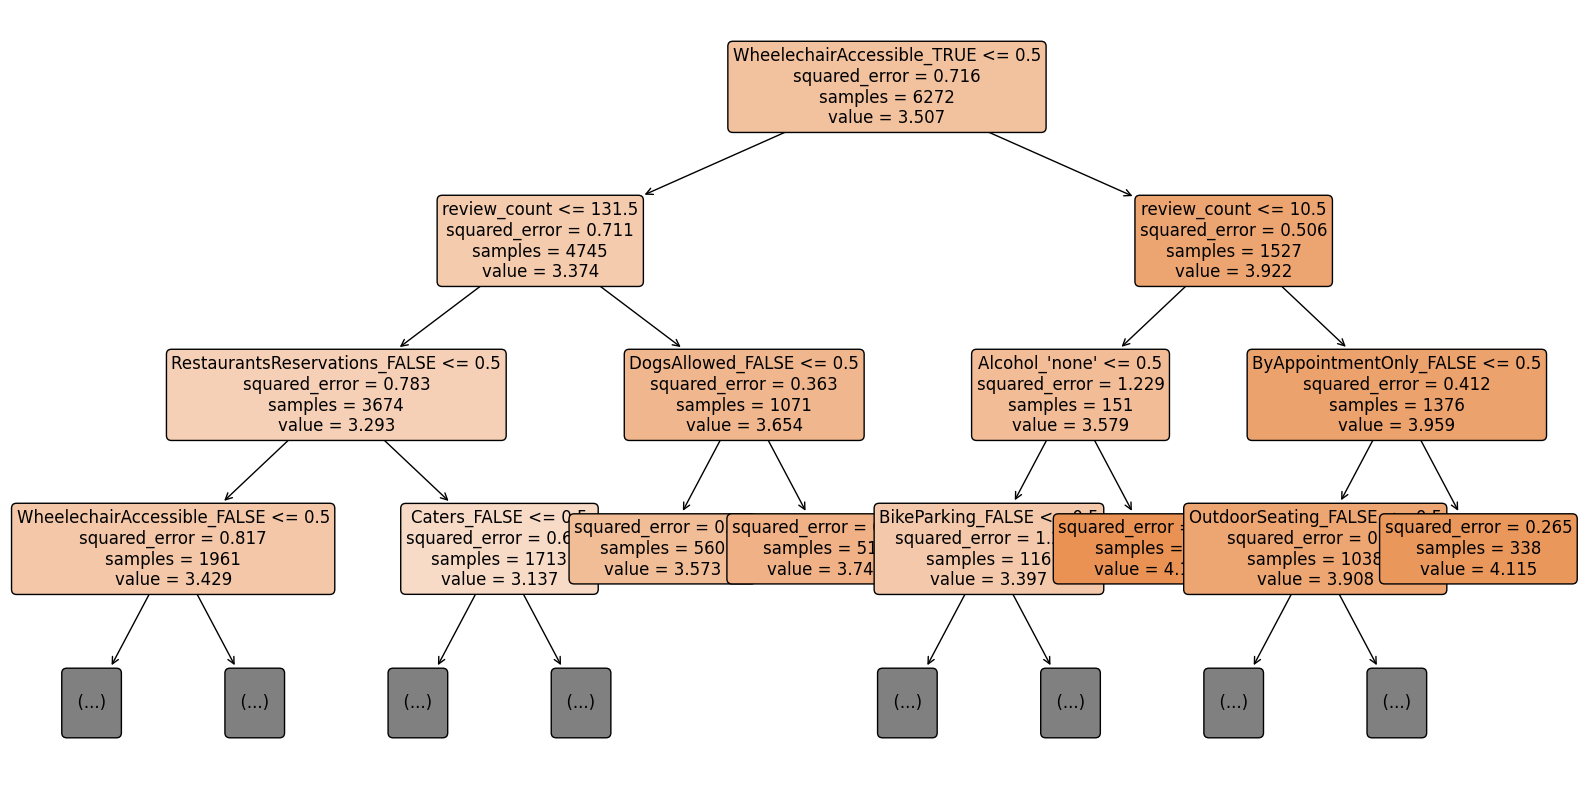

In [92]:
print('Node count =', dtc_reg_cv_acc.best_estimator_.tree_.node_count)

plt.figure(figsize=(20,10))
plot_tree(dtc_reg_cv_acc.best_estimator_, 
          feature_names=X_train_enc.columns, 
          class_names=['0','1'],
          filled=True,
          impurity=True,
          rounded=True,
          fontsize=12,
          max_depth=3)
plt.show()

My regression tree is dtc_reg_cv_acc.best_estimator_.

I set the parameters 'min_samples_leaf', 'min_samples_split', 'max_depth', 'random_state' with the values we used in discussion, and did the cross validation only with the parameter ccp_alpha.

I create an instance of GridSearchCV, a scikit-learn class that performs an exhaustive search over the ccp_alpha parameter grid to find the best one for a given model. I specify the model (DecisionTreeRegressor), the grid of hyperparameters, the scoring metric (neg_mean_squared_error, which measures the quality of the model's predictions), and the number of folds for cross-validation (cv=10). I used the negative mean squared error as it is the most used one for regression cross validation.

The GridSearchCV gives then a list of different values for cpp_alpha (201 values here between 0 and 0.1) and the corresponding negative mean squared error. I than only have to take the best cpp_alpha, which is the one that has the highest (closest to 0) negative mean squared error.

<b>(iii)</b>

In [93]:
def OSR2(model, X_test, y_test, y_train):
    
    y_pred = model.predict(X_test)
    SSE = np.sum((y_test - y_pred)**2)
    SST = np.sum((y_test - np.mean(y_train))**2)
                 
    return (1 - SSE/SST)

In [94]:
print('OSR2 linear regression:', OSR2(modela, X_test, Y_test, Y_train))
print('OSR2 decision tree:', OSR2(dtc_reg_cv_acc.best_estimator_, X_test_enc, Y_test_enc, Y_train_enc))

OSR2 linear regression: 0.17593242496774308
OSR2 decision tree: 0.18465426755660186


In [95]:
from sklearn.metrics import mean_absolute_error

y_pred_tree = dtc_reg_cv_acc.best_estimator_.predict(X_test_enc)
y_pred_line=modela.predict(X_test)

print('MAE linear regression:', mean_absolute_error(Y_test, y_pred_line))
print('MAE decision tree:', mean_absolute_error(Y_test_enc, y_pred_tree))


MAE linear regression: 0.6205260664008893
MAE decision tree: 0.6134296858843381


The OSR2 measures the proportion of the variance in the target that is predictable from the independent features. The higher a OSR2 is, the better it is. Here, both models have a low OSR2 which is an indicator of a poor prediction model, but the decision tree is doing a little bit better. However, we could see that the R² of the linear regression was also really low, and comparable to the OSR2. This shows that the model is not likely to overfit, but is just not really good. 

The MAE measures the average absolute difference between the predicted values and the actual values. Thus, the lower the better. Here, once again, the 2 models are comparable, with the decision doing a little bit better again. The target (stars) is between 0 and 5, so a MAE of 0.6 represents an error of more than 10%. This is probably quite significant.

As a whole, the models are not really performing well, but if we had to chose one it would be the decision tree. This lack of performance can be explained by the large amount of missing values. 

<u><b>QUESTION C</b></u>

In [116]:
yelp_train_enc['fourOrAbove'] = (yelp_train_enc['stars'] >= 4).astype(int)
yelp_test_enc['fourOrAbove'] = (yelp_test_enc['stars'] >= 4).astype(int)

yelp_train['fourOrAbove'] = (yelp_train['stars'] >= 4).astype(int)
yelp_test['fourOrAbove'] = (yelp_test['stars'] >= 4).astype(int)

Y_test_4orAbove=yelp_test_enc['fourOrAbove']

<u><b>QUESTION D</b></u>

<b>(i)</b>

I think that this is a reasonnable choice. Indeed, I feel that there is no priority for neither False Positive or False Negative. If we incorrectly guess that the business will have more than 4 stars it doesn't impact more the business than incorrectly guessing that the restaurant have less than 4 stars, and vice versa. We are not in the situation where we have to to determine if a patient has cancer and incorrectly guessing that he's not sick would cost his life. Here, both cases are alike in terms of repercussion.

<b>(ii)</b>

In [97]:
y_pred_line_4orAbove=(y_pred_line>=4).astype(int)
y_pred_tree_4orAbove=(y_pred_tree>=4).astype(int)

<b>(iii)</b>

In [103]:
logreg = smf.logit(formula = 'fourOrAbove ~ review_count + C(GoodForKids, Treatment("(Missing)")) + C(Alcohol, Treatment("(Missing)")) + C(BusinessAcceptsCreditCards, Treatment("(Missing)")) + C(WiFi, Treatment("(Missing)")) + C(BikeParking, Treatment("(Missing)")) + C(ByAppointmentOnly, Treatment("(Missing)")) + C(WheelechairAccessible, Treatment("(Missing)")) + C(OutdoorSeating, Treatment("(Missing)")) + C(RestaurantsReservations, Treatment("(Missing)")) + C(DogsAllowed, Treatment("(Missing)")) + C(Caters, Treatment("(Missing)"))',
                 data=yelp_train).fit()

print(logreg.summary())

Optimization terminated successfully.
         Current function value: 0.612512
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:            fourOrAbove   No. Observations:                 6272
Model:                          Logit   Df Residuals:                     6246
Method:                           MLE   Df Model:                           25
Date:                Fri, 08 Mar 2024   Pseudo R-squ.:                  0.1081
Time:                        23:25:23   Log-Likelihood:                -3841.7
converged:                       True   LL-Null:                       -4307.1
Covariance Type:            nonrobust   LLR p-value:                2.537e-180
                                                                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------------
Inte

<b>(iv)</b>

In [104]:
from sklearn.model_selection import GridSearchCV

Y_train_class=yelp_train_enc['fourOrAbove']
X_train_class = yelp_train_enc.drop(['stars', 'fourOrAbove'], axis=1)
grid_values = {'ccp_alpha': np.linspace(0, 0.10, 201),
               'min_samples_leaf': [5],
               'min_samples_split': [20],
               'max_depth': [30],
               'random_state': [88]}

            
dtc = DecisionTreeClassifier()
dtc_cv_acc = GridSearchCV(dtc, param_grid = grid_values, scoring = 'accuracy', cv=10, verbose=1) # default scoring metric to optimize is accuracy, used as default if none given.
dtc_cv_acc.fit(X_train_class, Y_train_class)

Fitting 10 folds for each of 201 candidates, totalling 2010 fits


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'ccp_alpha': array([0.    , 0.0005, 0.001 , 0.0015, 0.002 , 0.0025, 0.003 , 0.0035,
       0.004 , 0.0045, 0.005 , 0.0055, 0.006 , 0.0065, 0.007 , 0.0075,
       0.008 , 0.0085, 0.009 , 0.0095, 0.01  , 0.0105, 0.011 , 0.0115,
       0.012 , 0.0125, 0.013 , 0.0135, 0.014 , 0.0145, 0.015 , 0.0155,
       0.016 , 0.0165, 0.017 , 0.0175, 0.018 , 0.0185, 0.019 , 0.0195,
       0.02  , 0.02...
       0.08  , 0.0805, 0.081 , 0.0815, 0.082 , 0.0825, 0.083 , 0.0835,
       0.084 , 0.0845, 0.085 , 0.0855, 0.086 , 0.0865, 0.087 , 0.0875,
       0.088 , 0.0885, 0.089 , 0.0895, 0.09  , 0.0905, 0.091 , 0.0915,
       0.092 , 0.0925, 0.093 , 0.0935, 0.094 , 0.0945, 0.095 , 0.0955,
       0.096 , 0.0965, 0.097 , 0.0975, 0.098 , 0.0985, 0.099 , 0.0995,
       0.1   ]),
                         'max_depth': [30], 'min_samples_leaf': [5],
                         'min_samples_split': [20], 'random_state': [88]},
             scoring='accuracy', verbose=1)

In [128]:
acc = dtc_cv_acc.cv_results_['mean_test_score'] # what sklearn calls mean_test_score is the holdout set, i.e. the validation set.
ccp = dtc_cv_acc.cv_results_['param_ccp_alpha'].data

In [106]:
print('Grid best parameter ccp_alpha (max. accuracy): ', dtc_cv_acc.best_params_['ccp_alpha'])
print('Grid best score (accuracy): ', dtc_cv_acc.best_score_)

Grid best parameter ccp_alpha (max. accuracy):  0.0005
Grid best score (accuracy):  0.6666140960391714


Node count = 111


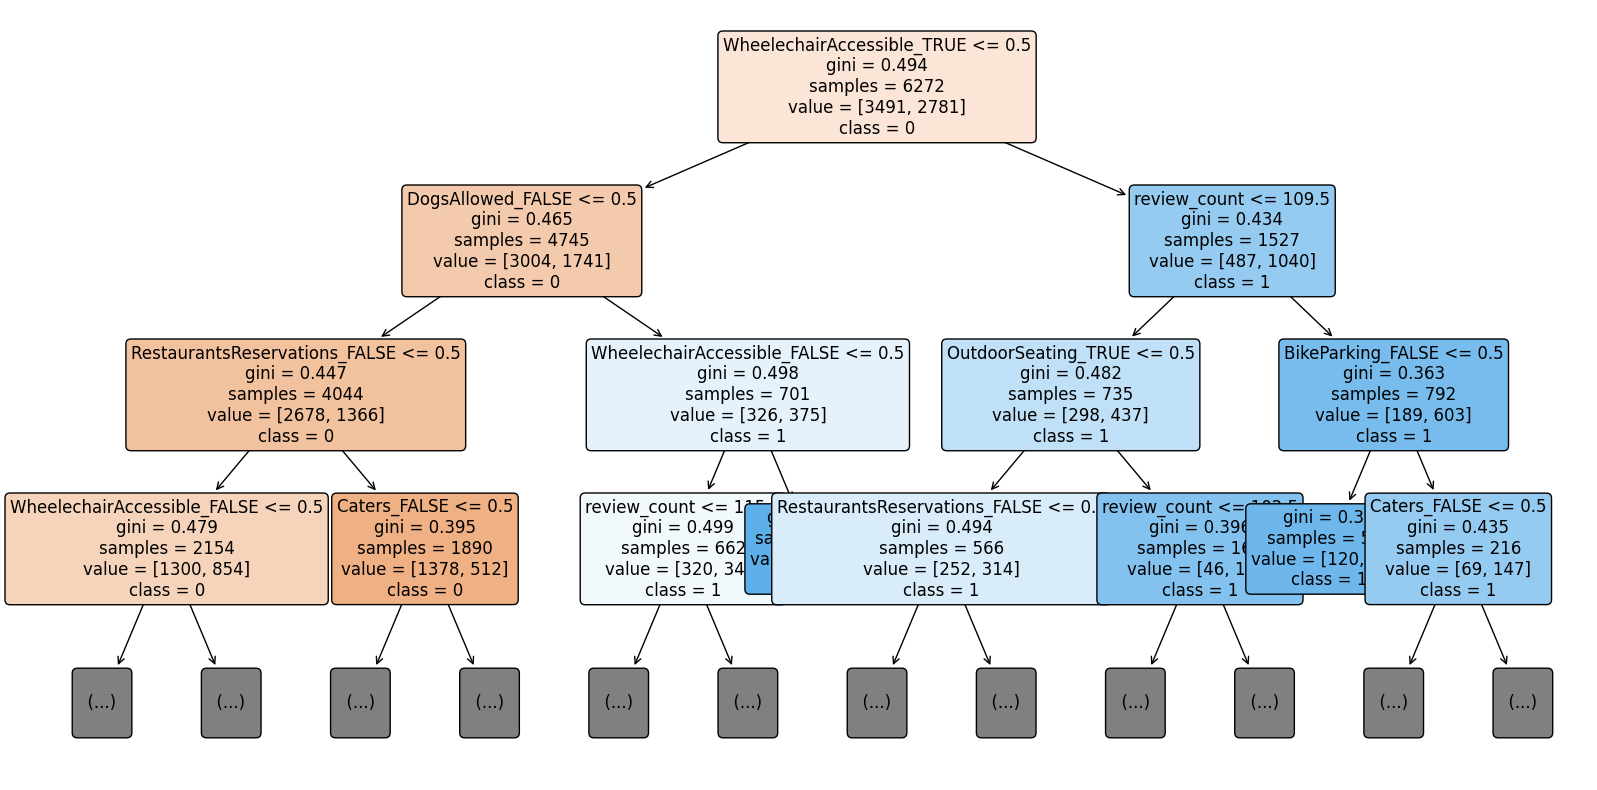

In [108]:
print('Node count =', dtc_cv_acc.best_estimator_.tree_.node_count)

plt.figure(figsize=(20,10))
plot_tree(dtc_cv_acc.best_estimator_, 
          feature_names=X_train_class.columns, 
          class_names=['0','1'],
          filled=True,
          impurity=True,
          rounded=True,
          fontsize=12,
          max_depth=3)
plt.show()

My classification tree is dtc_cv_acc.best_estimator_.

I set the parameters 'min_samples_leaf', 'min_samples_split', 'max_depth', 'random_state' with the values we used in discussion, and did the cross validation only with the parameter ccp_alpha.

I create an instance of GridSearchCV, a scikit-learn class that performs an exhaustive search over the ccp_alpha parameter grid to find the best one for a given model. I specify the model (DecisionTreeClassifier), the grid of hyperparameters, the scoring metric (Accuracy), and the number of folds for cross-validation (cv=10). I used the Accuracy as this is the metric we are focusing on (question d. (i)).

The GridSearchCV gives then a list of different values for cpp_alpha (201 values here between 0 and 0.1) and the corresponding Accuracy. I than only have to take the best cpp_alpha, which is the one that has the highest Accuracy. I then have all my parameters for the classification Tree.

In [109]:
#baseline model:
yelp_train_enc['fourOrAbove'].sum()/len(yelp_train_enc)


0.44339923469387754

<b>(v)</b>

The baseline will then always predict that it's bellow four.

In [110]:
nb_4orAbove=yelp_test_enc['fourOrAbove'].sum() 
nb_less=len(yelp_test_enc)-nb_4orAbove 


print("Baseline Accuracy=",nb_less/len(yelp_test_enc))

Baseline Accuracy= 0.5636160714285714


In [132]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc

cm_line = confusion_matrix(Y_test_4orAbove, y_pred_line_4orAbove)
print ("Confusion Matrix linear regression : \n", cm_line)
print("Accuracy=",(cm_line[0][0]+cm_line[1][1])/len(Y_test_4orAbove))
print("TPR=", cm_line[1][1]/(cm_line[1][1]+cm_line[1][0]))
print("FPR=", cm_line[0][1]/(cm_line[0][1]+cm_line[0][0]))


fpr, tpr, _ = roc_curve(Y_test_4orAbove, y_pred_line_4orAbove)
roc_auc = auc(fpr, tpr)

print('ROC=', roc_auc)

Confusion Matrix linear regression : 
 [[1457   58]
 [ 924  249]]
Accuracy= 0.6346726190476191
TPR= 0.21227621483375958
FPR= 0.03828382838283828
ROC+ 0.5869961932254607


In [133]:
cm_reg_tree = confusion_matrix(Y_test_4orAbove, y_pred_tree_4orAbove)
print ("Confusion Matrix regression tree: \n", cm_reg_tree)

print("Accuracy=",(cm_reg_tree[0][0]+cm_reg_tree[1][1])/len(Y_test_4orAbove))
print("TPR=", cm_reg_tree[1][1]/(cm_reg_tree[1][1]+cm_reg_tree[1][0]))
print("FPR=", cm_reg_tree[0][1]/(cm_reg_tree[0][1]+cm_reg_tree[0][0]))

fpr, tpr, _ = roc_curve(Y_test_4orAbove, y_pred_tree_4orAbove)
roc_auc = auc(fpr, tpr)

print('ROC=', roc_auc)

Confusion Matrix regression tree: 
 [[1422   93]
 [ 864  309]]
Accuracy= 0.6439732142857143
TPR= 0.26342710997442453
FPR= 0.061386138613861385
ROC= 0.6010204856802815


In [134]:
y_prob = logreg.predict(yelp_test)
y_pred_log = pd.Series([1 if x > 0.5 else 0 for x in y_prob], index=y_prob.index)

cm_log=confusion_matrix(Y_test_4orAbove, y_pred_log)

print ("Confusion Matrix logistic regression: \n", cm_log)

print("Accuracy=",(cm_log[0][0]+cm_log[1][1])/len(Y_test_4orAbove))
print("TPR=", cm_log[1][1]/(cm_log[1][1]+cm_log[1][0]))
print("FPR=", cm_log[0][1]/(cm_log[0][1]+cm_log[0][0]))

fpr, tpr, _ = roc_curve(Y_test_4orAbove, y_pred_log)
roc_auc = auc(fpr, tpr)

print('ROC=', roc_auc)

Confusion Matrix logistic regression: 
 [[1254  261]
 [ 601  572]]
Accuracy= 0.6793154761904762
TPR= 0.4876385336743393
FPR= 0.17227722772277226
ROC= 0.6576806529757836


In [135]:
y_pred_class_tree=dtc_cv_acc.best_estimator_.predict(X_test_enc)

cm_class_tree=confusion_matrix(Y_test_4orAbove, y_pred_class_tree)

print ("Confusion Matrix class tree: \n", cm_class_tree)

print("Accuracy=",(cm_class_tree[0][0]+cm_class_tree[1][1])/len(Y_test_4orAbove))
print("TPR=", cm_class_tree[1][1]/(cm_class_tree[1][1]+cm_class_tree[1][0]))
print("FPR=", cm_class_tree[0][1]/(cm_class_tree[0][1]+cm_class_tree[0][0]))

fpr, tpr, _ = roc_curve(Y_test_4orAbove, y_pred_class_tree)
roc_auc = auc(fpr, tpr)

print('ROC=', roc_auc)

Confusion Matrix class tree: 
 [[1229  286]
 [ 618  555]]
Accuracy= 0.6636904761904762
TPR= 0.4731457800511509
FPR= 0.18877887788778877
ROC= 0.6421834510816811


Here's a summary of the results:


                | baseline | Linear Regression | Regression Tree | Logistic Regression | Classification Tree | 
    | Accuracy  |  0.5636  |      0.6347       |     0.6440      |        0.6793       |       0.6637        |
    |   TPR     |    0     |      0.2123       |     0.2634      |        0.4876       |       0.4731        |
    |   FPR     |    0     |      0.0383       |     0.0614      |        0.1723       |       0.1888        |
    |  ROC AUC  |          |      0.5870       |     0.6010      |        0.6577       |       0.6422        |


The Accuracy measures how well the model predict all the cases. It shows the frequency of correct answers (predictions). \
Here, most of Accuracies are close to 0.60, which means that 60% of the testing data set was correctly forecasted. This seems quite reasonable. However 0.6 gives a large room for improvement. Once again the Missing Values are probably impacting a lot the Accuracy. The more the Accuracy is close to 1 the better it is. The four models are than better to forecast than the baseline and a random guess, and the best one is the logistic classification than classification Tree. 

The True Positive Rate measures how well the model correctly identifies the business that will get more than 4 stars. It represents: among all the businesses which one actually got more than 4 stars, how many of them did the model correctly classify as having more than 4 stars. The more the TPR is close to 1 the better it is.\
Here, the TPR of the linear regression and regression tree are close to 0.2, which mean that 20% of the businesses that got more than 4 stars was spotted by the model. This is pretty low. The other models (excluded the baseline) are doing way better with nearly 50% of correct forecast, which is more reasonable. So once again the logistic and classification Tree are the best ones. The logistic is still first.

The Negative Positive Rate measures how often the model classify a business that will not get more than 4 stars as one that will. Which is that, out all of the businesses that got less than 4 stars, how many of them were incorrectly predicted as getting more than 4 stars.\
Here, the FPR are really low, especially for the linear regression and regression tree. This is probably because the models tend to classify more businesses as getting less than 4 stars. This is a good sign, the lesser the FPR is the better. 

In conclusion, the baseline model, linear regression and regression tree has a really a really good FPR, but way too low TPR (so the trade-off TPR-FPR is pretty bad), and their accuracies do not beat the other 2 models, so we can get rid of them. Between the logistic regression and the classification tree, the results are quite similar. However, the logistic regression is better on the Accuracy and TPR, while its FPR is still quite low. I've checked the ROC AUC and this model is also better for the tradeoff TPR-FPR. 

The model I would recommend is then the Logistic Regression.

<u><b>QUESTION E</b></u>

Our first split for the Classification Tree is on wether the business is wheeled chair accessible. The split says that if the business is accesible for wheele chair, the business has more chance to have a 4 star grade. On the tree, among the businesses that do have this option, 1040 have more than 4 stars while only 487 have less. On the other hand, those for which the accessibility is lacking or if it's a missing information, they stars are in average less than 4.\
My first advice is thus to make sure your business is accessible for wheele chairs. Also, advertising the fact that it is wheele chair accessible can be interesting. When it was a missing information, it was grouped with the businesses that didn't get such an accessibility. And maybe, this lack of information played on the star review. 


The next split is on number of reviews. If the business followed my first advice and is wheele chair accessible, I would adivise to raise its number of reviews up to more than 110. Among the businesses accessible in wheele chair, if their number of review is below 109.5, 437 of them have more than 4 stars and 298 have less. Which gives a ratio of approximately 60% of businesses above 4 stars. However, if their number of review is above 109.5, 603 of them have more than 4 stars and only 189 have less. Which gives a ratio of approximately 76% of businesses above 4 stars. I would then advise the business holder to try to convince the clients to leave a review, especially if they have enjoyed. It is true that many people tend more to write a review for complaining rather than for promoting the business because of frustration. So encouraging the satisfied clients to write a review could be a good way to raise the number of stars. 


My last advice would be about whether the business allows dogs. If it clearly bans dogs, the ratio is 375 above 4 stars against 326 under. On the otherhand, if they allow it or the data is missing, there 2678 under 4 stars vs 1366 above. Thus, if you clearly ban dogs (so that people get the information), you have 50/50 chance of having above 4 stars (even a bit more). However, in the other case, your chances to have 4 stars or above drop. Thus, I would advise to explicitely ban dogs from your business.\
Nevertheless, we have to be carefull as more than 70% of the data on wheter dogs were allowed are missing. This could be a problem on how they collect the data rather than businesses not clearly stating that they allowed dogs or not.


